In [109]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [110]:
df_test=pd.read_csv('/content/drive/MyDrive/archive/test.csv')
df_train=pd.read_csv('/content/drive/MyDrive/archive/train.csv')

In [111]:
df_train.head(150)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
145,145,FBI Finds Previously Unseen Hillary Clinton Em...,Zero Hedge,\nCrushing the hope-filled “it’s just a backup...,1
146,146,2 Years After This American Journalist Was Kil...,Starkman,Serena Shim is an American citizen of Lebanese...,1
147,147,Report: Illegal Aliens Forego Food Stamps to S...,AWR Hawkins,Illegal aliens in San Francisco have reportedl...,0
148,148,Make Netherlands Great Again! Hahaha It's Spre...,The European Union Times,\nGeert Wilders is the founder and leader of t...,1


In [112]:
df_test.head(150)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
145,20945,"Foreigners Have Long Mined Indonesia, but Now ...",Jon Emont,"JAKARTA, Indonesia — Crowned with spiky fea..."
146,20946,"Syrian War Report – November 15, 2016: 500 Mil...",The Saker,Leave a Reply Click here to get more info on f...
147,20947,Nuclear Reactor in Norway Leaks Radioactive Io...,admin,"Prison Planet.com October 26, 2016 \nOne of No..."
148,20948,Earthquake Leaves a Trail of Destruction in Ec...,Maggy Ayala and Kirk Semple,"PORTOVIEJO, Ecuador — The rumbling had ende..."


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [114]:
#removing null values
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [115]:
df_train=df_train.fillna(" ")

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [117]:
#merging columns
df_train['news']=df_train['author']+' '+df_train['title']

In [118]:
#removing unwanted columns
df_train.drop(columns = 'id',axis=1,inplace=True)

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   author  20800 non-null  object
 2   text    20800 non-null  object
 3   label   20800 non-null  int64 
 4   news    20800 non-null  object
dtypes: int64(1), object(4)
memory usage: 812.6+ KB


In [120]:
df_train.head(10)

,title,author,text,label,news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorit...
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin Benoît Hamon Wins French Socia...
8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trum...
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane A Back-Channel Pl...


In [121]:
df_train.drop(columns = ['text','author','title'],axis=1,inplace=True)

In [122]:
df_train.head(10)

,label,news
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...
5,0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,1,Life: Life Of Luxury: Elton John’s 6 Favorit...
7,0,Alissa J. Rubin Benoît Hamon Wins French Socia...
8,0,Excerpts From a Draft Script for Donald Trum...
9,0,Megan Twohey and Scott Shane A Back-Channel Pl...


In [123]:
#removing the punctuations
#Creating a copy 
clean_news=df_train.copy()
def review_cleaning(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text
clean_news['news'] = clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,label,news
0,1,darrell lucus house dem aide we didn’t even se...
1,0,daniel j flynn flynn hillary clinton big woman...
2,1,consortiumnewscom why the truth might get you ...
3,1,jessica purkiss civilians killed in single us...
4,1,howard portnoy iranian woman jailed for fictio...


In [124]:

nltk.download('stopwords')

stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,news
0,1,darrell lucus house dem aide didn’t even see c...
1,0,daniel j flynn flynn hillary clinton big woman...
2,1,consortiumnewscom truth might get fired
3,1,jessica purkiss civilians killed single us air...
4,1,howard portnoy iranian woman jailed fictional ...


In [125]:
x = np.array([0,1])
false = (clean_news["label"] == 1).sum()
true = (clean_news["label"] == 0).sum()


In [126]:
true, false

(10387, 10413)

new 7165
times 6474
york 6412
trump 3561
breitbart 2753
hillary 1229
clinton 1181
us 973
donald 903
news 765
election 577
michael 576
obama 553
john 535
russia 496
world 437
war 431
says 415
fbi 392
video 363


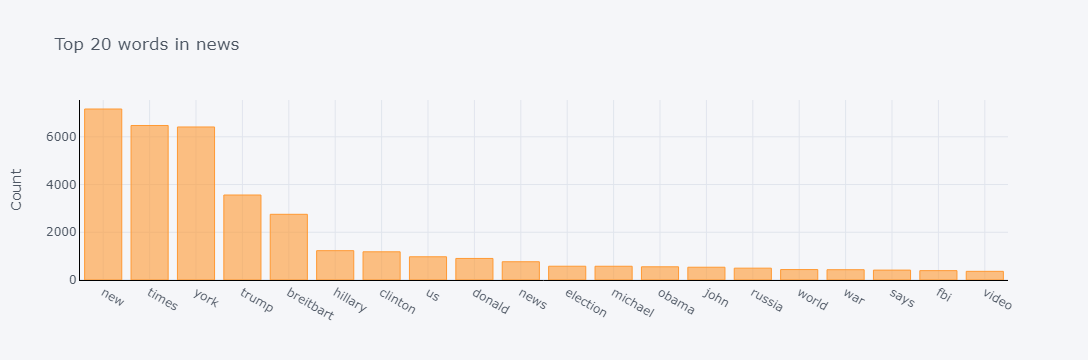

In [127]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

new york 6410
york times 6302
donald trump 863
hillary clinton 521
pam key 243
briefing new 203
jerome hudson 171
white house 170
breitbart news 158
evening briefing 148
charlie spiering 141
john hayward 140
maggie haberman 139
sandra stevenson 128
katherine rodriguez 124
warner todd 122
todd huston 122
ian hanchett 119
daniel nussbaum 116
trump new 113


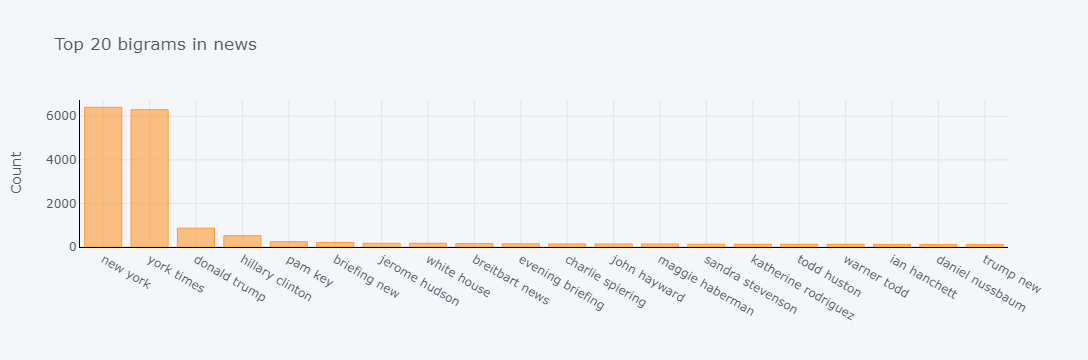

In [128]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

In [129]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,darrell lucus house dem aide didn’t even see c...
1,daniel j flynn flynn hillary clinton big woman...
2,consortiumnewscom truth might get fired
3,jessica purkiss civilians killed single us air...
4,howard portnoy iranian woman jailed fictional ...


In [130]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

In [131]:
corpus[1]

'daniel j flynn flynn hillari clinton big woman campu breitbart'

In [132]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(20800, 5000)

In [133]:
#Getting the target variable
y=clean_news['label']

In [134]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({1: 10413, 0: 10387})


In [135]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [136]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9883653846153846
Decision Tree Test Accuracy: 0.9947115384615385
KNN Test Accuracy: 0.8960096153846152
Naive Bayes Test Accuracy: 0.978173076923077


In [137]:
#Logistic Regression with Hyperparameter Tuning
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=51.79474679231202, random_state=0)
The mean accuracy of the model is: 0.9928846153846154


In [138]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

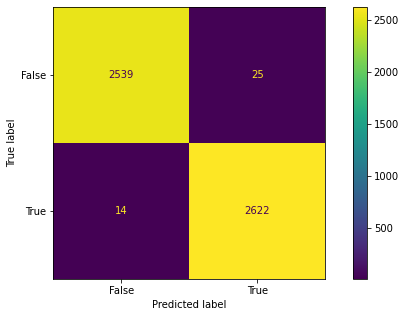

In [140]:
#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [141]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2564
           1       0.99      0.99      0.99      2636

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



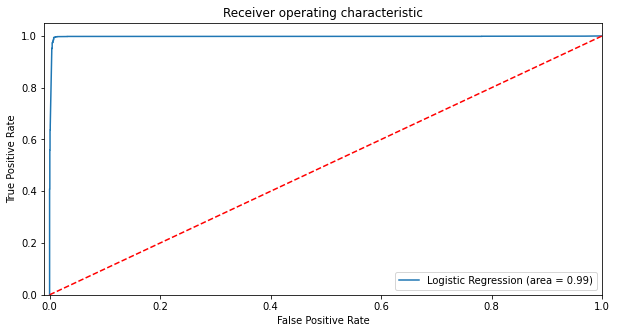

In [142]:
#ROC-AUC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [143]:
#Deep learning-LSTM
corpus[1]

'daniel j flynn flynn hillari clinton big woman campu breitbart'

In [144]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [145]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2537 6991 5610]
 [   0    0    0 ...  730 3055 9087]
 [   0    0    0 ...  846 8626 4953]
 ...
 [   0    0    0 ... 8173 3689 9933]
 [   0    0    0 ... 6221 5406 9479]
 [   0    0    0 ... 1764 8273 1201]]


In [146]:
embedded_docs[1]

array([   0,    0,    0, ...,  730, 3055, 9087], dtype=int32)

In [147]:
#LSTM Model
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5000, 40)          400000    
                                                                 
 dropout_4 (Dropout)         (None, 5000, 40)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
len(embedded_docs),y.shape

(20800, (20800,))

In [149]:
#Fitting the LSTM Model
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((20800, 5000), (20800,))

In [150]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 61s 249ms/step - loss: 0.3743 - accuracy: 0.8398 - val_loss: 0.1015 - val_accuracy: 0.9655
Epoch 2/10
218/218 [==============================] - 45s 205ms/step - loss: 0.0516 - accuracy: 0.9848 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 3/10
218/218 [==============================] - 47s 216ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 4/10
218/218 [==============================] - 43s 196ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 5/10
218/218 [==============================] - 42s 194ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 6/10
218/218 [==============================] - 42s 195ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0365 - val_accuracy: 0.9898
Epoch 7/10
218/218 [==============================] - 42s 194ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0467 - val_ac

In [151]:
"""import pickle
filename = 'LSTM.sav'
pickle.dump(model, open('/content/drive/MyDrive/models/LSTM.sav','wb'))"""

"import pickle\nfilename = 'LSTM.sav'\npickle.dump(model, open('/content/drive/MyDrive/models/LSTM.sav','wb'))"

In [152]:
"""import pickle
model = pickle.load(open('/content/drive/MyDrive/models/LSTM.sav','rb'))"""

"import pickle\nmodel = pickle.load(open('/content/drive/MyDrive/models/LSTM.sav','rb'))"

215/215 [==============================] - 12s 54ms/step


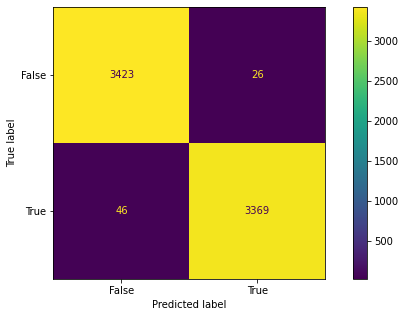

In [153]:
# Predicting from test data
y_pred=(model.predict(X_test) > 0.5).astype("int32")

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [154]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

0.9895104895104895

In [155]:
# Creating classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3449
           1       0.99      0.99      0.99      3415

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



In [158]:
%%time
model.predict(X_test[:1])

1/1 [==============================] - 0s 74ms/step
CPU times: user 111 ms, sys: 11.8 ms, total: 123 ms
Wall time: 126 ms


array([[0.99999785]], dtype=float32)

In [159]:
%%time
logreg.predict(X_test[:1])

CPU times: user 498 µs, sys: 0 ns, total: 498 µs
Wall time: 514 µs


array([1])

In [156]:
"END"

'END'